In [9]:
import numpy as np
import os
import sys
currentdir = os.path.dirname(os.path.realpath('__file__'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from dataset import Dataset
from tools import distance,new_seed,execution_time
import matplotlib.pyplot as plt

In [6]:
dataset_name = 'test.csv'
dataset_path=f'{parentdir}/dataset/{dataset_name}'
x = Dataset(dataset_path)

In [7]:
c=x.sample


In [8]:
res=kpp(x,1000)

NameError: name 'kpp' is not defined

In [ ]:
# import os
# dir_root=os.path.normpath(os.getcwd() + os.sep + os.pardir)

        


10527.1756113

In [10]:
# algorithm 1 K-Means++
class kpp:
    

    def __init__(
        self,
        dataset:Dataset
        )->None:

        
        self.dataset = dataset
        self.n=dataset.number_of_sample
        self.d=dataset.number_of_feature
        self.X=dataset.sample
        self.m = None
        self.K=None


    @execution_time
    def fit(
        self,
        number_of_cluster:int ,
        sample_weight:np.ndarray=None
        )->np.ndarray:
        
        self.m=np.empty((0, self.d))
        self.K=number_of_cluster
        assert self.n>self.K,\
            'number of cluster is greater than number of sample' 
            
        if sample_weight:
            self.sample_weight=np.array(sample_weight)
        else:
            self.sample_weight=np.ones(self.n)
        self.sample_weight=self.sample_weight.reshape((-1,1)) 
        # line 1
        beta=self.sample_weight/np.sum(self.sample_weight)
        # line 2
        m=np.vstack((self.m,new_seed(self.X,1,beta)))
        # line 3
        alpha=np.array([np.inf]*self.n).reshape((-1,1))
        k=1
        # line 4
        while k <self.K:
            # line 5,6
            alpha=np.minimum(alpha,distance(self.X,m[k-1].reshape((1,-1))))
            # line 7,8
            t=self.sample_weight*(alpha**2)
            beta=t/np.sum(t)
            # line 9
            k+=1
            # line 10
            m=np.vstack((m,new_seed(self.X,1,beta)))
        # line 11
        return np.array(m)
    
    

In [12]:
t=kpp(x)


In [13]:
t.fit(2)

func:fit took: 0.0010051727294921875 sec


array([[4., 3.],
       [0., 4.]])

In [ ]:

m=np.empty((0,t.d))
m=np.vstack((m,new_seed(t.X,1,beta)))
m=np.vstack((m,new_seed(t.X,1,beta)))
m=np.vstack((m,new_seed(t.X,1,beta)))
m

array([[2., 0.],
       [2., 3.],
       [3., 3.]])

In [ ]:
c

array([[1., 0.],
       [2., 4.]])

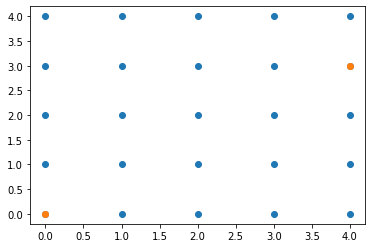

In [ ]:
c=t.fit(2)
plt.scatter(t.X[:,0],t.X[:,1])
plt.scatter(c[:,0],c[:,1])

In [ ]:

d=np.append(d,[1,4,3],axis=1)

In [ ]:
d

array([1., 2., 3., 1., 4., 3.])

In [ ]:
c=np.array([[0,0],[2,2]])

In [ ]:
j=np.array([[0,2],[0,4]])

In [ ]:
np.linalg.norm(c[:,None,:]-j,axis=2)  

array([[2.        , 4.        ],
       [2.        , 2.82842712]])

In [ ]:
j=np.empty(5)

In [ ]:
j

array([3.00000000e+000, 4.67296746e-307, 4.94065646e-321, 6.95314361e-310,
       3.38460833e+125])

In [ ]:
beta=t.sample_weight/np.sum(t.sample_weight)
new_seed(x.sample,1,beta).shape

(1, 2)

In [ ]:
t.sample_weight.shape

(11055, 1)

In [ ]:
c=np.array([1,2,3])
j=np.array([4,1,6])

In [ ]:
c*j**2/np.sum(c*j**2)

array([0.12698413, 0.01587302, 0.85714286])

In [ ]:
16/126

0.12698412698412698